In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [9]:
import seaborn as sns

In [118]:
import difflib

In [188]:
import matplotlib.pyplot as plt

###The goal of script is to analyze and visualize Chica sex determination data focusing on read coverage

In [6]:
data = pd.read_csv("C://Users/Owner/OneDrive/School/Data, analyses/ChicaPopGen/Samtools indexing for depth/mean_and_sd_coverage_combined.csv")

,Scaffolds,Chica1_1_meanCoverage,Chica1_1_sdCoverage,Chica1_2_meanCoverage,Chica1_2_sdCoverage,Chica1_3_meanCoverage,Chica1_3_sdCoverage,Chica1_4_meanCoverage,Chica1_4_sdCoverage,Chica1_5_meanCoverage,...,Chica5_1_meanCoverage,Chica5_1_sdCoverage,Chica5_2_meanCoverage,Chica5_2_sdCoverage,Chica5_3_meanCoverage,Chica5_3_sdCoverage,Chica5_4_meanCoverage,Chica5_4_sdCoverage,Chica5_5_meanCovera,Chica5_5_sdCovera
0,KB871578.1,19.413955,81.987353,16.760530,77.917957,16.889603,77.170843,15.780526,72.768727,16.466872,...,16.119820,73.431375,15.361610,71.138758,17.856956,79.182670,17.574500,75.596912,16.053073,73.334494
1,KB871579.1,19.282897,67.101396,16.560078,59.232316,17.138219,60.090474,15.825007,56.599352,16.497723,...,15.961844,57.840378,15.450392,54.483037,18.147928,63.100267,17.712773,59.747140,16.231544,57.936438
2,KB871580.1,19.630793,88.503955,16.910572,79.839155,17.014600,80.458281,16.039311,76.266913,16.691072,...,15.981568,76.204019,15.417151,73.042701,17.845945,83.665880,17.564939,81.385502,16.268325,75.416366
3,KB871581.1,20.428401,46.131924,17.345277,39.387848,18.137062,45.533176,16.662093,46.575912,17.340454,...,16.745680,46.115145,16.250526,40.107298,18.947310,51.036277,18.690527,43.173430,16.739346,37.523886
4,KB871582.1,18.657653,28.060572,15.932997,24.622503,16.087285,23.980616,15.010306,22.331428,15.581851,...,15.355558,23.555737,14.655541,22.605872,17.101520,25.549308,16.906903,23.982765,15.489264,24.131018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734 entries, 0 to 10733
Data columns (total 39 columns):
Scaffolds                 10734 non-null object
Chica1_1_meanCoverage     10722 non-null float64
Chica1_1_sdCoverage       10722 non-null float64
Chica1_2_meanCoverage     10726 non-null float64
Chica1_2_sdCoverage       10726 non-null float64
Chica1_3_meanCoverage     10728 non-null float64
Chica1_3_sdCoverage       10728 non-null float64
Chica1_4_meanCoverage     10723 non-null float64
Chica1_4_sdCoverage       10723 non-null float64
Chica1_5_meanCoverage     10731 non-null float64
Chica1_5_sdCoverage       10731 non-null float64
Chica1_6_meanCoverage     10725 non-null float64
Chica1_6_sdCoverage       10725 non-null float64
Chica1_7_meanCoverage     10725 non-null float64
Chica1_7_sdCoverage       10725 non-null float64
Chica1_8_meanCoverage     10723 non-null float64
Chica1_8_sdCoverage       10723 non-null float64
Chica1_9_meanCoverage     10726 non-null float64
Chica1_9_s

In [132]:
sexes = pd.read_csv("C://Users/Owner/OneDrive/School/Data, analyses/ChicaPopGen/fish_sexes.csv",header=None)

In [133]:
sexes.columns = ['IDs','Sexes']

In [87]:
data.set_index('Scaffolds',inplace=True)

KeyError: 'Scaffolds'

In [111]:
means = data.filter(regex = "mean")

In [112]:
means = means.transpose()

In [113]:
means.index.name = "IDs"

In [114]:
means = means.sort_index()

In [125]:
means.index

Index(['Chica1_10_meanCoverage', 'Chica1_11_meanCoverage',
       'Chica1_12_meanCoverage', 'Chica1_13_meanCoverage',
       'Chica1_14_meanCoverage', 'Chica1_1_meanCoverage',
       'Chica1_2_meanCoverage', 'Chica1_3_meanCoverage',
       'Chica1_4_meanCoverage', 'Chica1_5_meanCoverage',
       'Chica1_6_meanCoverage', 'Chica1_7_meanCoverage',
       'Chica1_8_meanCoverage', 'Chica1_9_meanCoverage',
       'Chica5_1_meanCoverage', 'Chica5_2_meanCoverage',
       'Chica5_3_meanCoverage', 'Chica5_4_meanCoverage',
       'Chica5_5_meanCovera'],
      dtype='object', name='IDs')

In [142]:
means_tj = means.reset_index(drop=True)

In [140]:
sexes.reset_index(drop=True)

,IDs,Sexes
0,Chica1_11,F
1,Chica1_12,F
2,Chica1_1,F
3,Chica1_2,F
4,Chica1_5,F
5,Chica1_7,F
6,Chica5_3,F
7,Chica5_4,F
8,Chica1_10,M
9,Chica1_13,M


In [144]:
df = pd.concat([sexes,means_tj],axis=1)

In [148]:
df

,IDs,Sexes,KB871578.1,KB871579.1,KB871580.1,KB871581.1,KB871582.1,KB871583.1,KB871584.1,KB871585.1,...,KB875662.1,KB875671.1,KB875757.1,KB877713.1,KB878698.1,KB881627.1,KB881247.1,KB875947.1,KB875727.1,KB875963.1
0,Chica1_11,F,17.157523,17.490387,17.231895,18.045591,16.762251,17.025074,15.610934,15.991869,...,NaN,NaN,2.153846,8.29875,4.289216,20.154070,2.000000,6.569301,NaN,NaN
1,Chica1_12,F,16.751444,16.797734,16.797811,17.681088,16.227183,16.490457,15.467931,15.554831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chica1_1,F,16.740786,16.786442,17.005563,17.413492,16.064122,16.540954,15.388489,15.919066,...,1.0,12.556437,2.739336,NaN,2.680723,31.888060,1.206522,4.877434,NaN,NaN
3,Chica1_2,F,17.860941,17.911895,18.033577,18.531822,17.087837,17.539878,16.202318,16.753521,...,NaN,13.948854,8.039788,NaN,5.948429,36.852858,2.000000,NaN,NaN,NaN
4,Chica1_5,F,16.511446,16.645357,16.637115,17.041544,15.692958,16.348347,15.183588,15.690236,...,NaN,1.000000,1.764977,NaN,1.000000,27.784884,NaN,5.745704,NaN,1.95
5,Chica1_7,F,19.413955,19.282897,19.630793,20.428401,18.657653,19.170495,17.777377,18.296232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Chica5_3,F,16.760530,16.560078,16.910572,17.345277,15.932997,16.615273,15.376640,15.827900,...,1.0,12.637566,12.559494,1.00000,10.666201,35.548450,NaN,NaN,NaN,NaN
7,Chica5_4,F,16.889603,17.138219,17.014600,18.137062,16.087285,16.548717,15.567976,15.785046,...,1.0,12.345141,1.132911,1.00000,1.574468,38.954163,1.000000,NaN,NaN,NaN
8,Chica1_10,M,15.780526,15.825007,16.039311,16.662093,15.010306,15.620673,14.465267,15.176112,...,NaN,7.856799,1.370690,NaN,3.125000,27.181425,NaN,1.000000,NaN,NaN
9,Chica1_13,M,16.466872,16.497723,16.691072,17.340454,15.581851,15.993581,14.908118,15.454052,...,NaN,12.578483,29.592760,1.00000,5.767918,37.255814,3.850000,1.000000,4.312676,NaN


In [150]:
df_agg = df.groupby(by='Sexes').mean()

In [156]:
df_agg = df_agg.dropna(axis=1)

In [166]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, F to M
Columns: 10731 entries, KB871578.1 to KB875947.1
dtypes: float64(10731)
memory usage: 167.7+ KB


In [192]:
g = sns.jointplot(df_agg.loc['F'],df_agg.loc['M'])

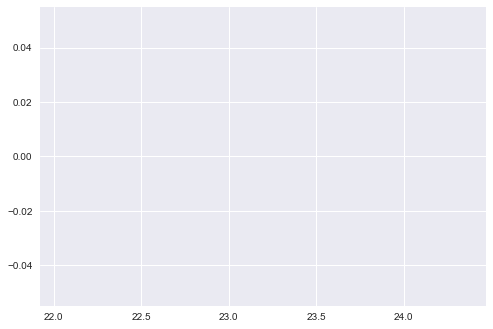

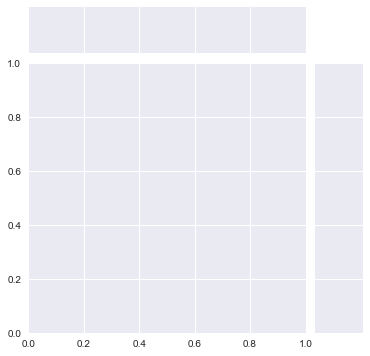

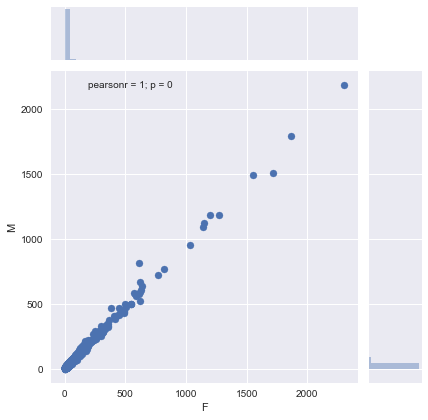

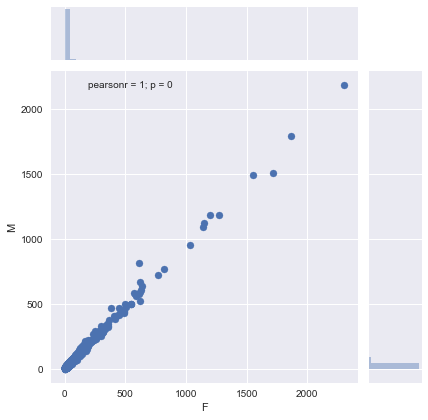

In [189]:
plt.show()

(array([ 1.40122155,  1.61371987,  2.58026488,  1.19077793,  2.56794936,
         1.76867266,  2.09604739,  2.88159582,  1.60549352,  1.48171038,
         1.40586214,  2.61799102,  1.92895325,  2.07472575,  2.4335332 ,
         1.85040428,  2.38546563,  2.28779725,  0.82267213,  2.41494951,
         1.86706913,  1.87219154,  1.73472905,  2.09242383,  2.60975728,
         2.26267894,  2.37889493,  2.42831791,  2.96682448,  1.91847156,
         2.14468798,  2.41898887,  2.22528028,  1.82900971,  2.3788507 ,
         2.80153342,  1.14382096,  1.69983329,  2.17929841,  1.68102589,
         2.39724276,  2.516633  ,  1.42161961,  1.77149163,  1.34794479,
         1.61570774,  3.09049552,  2.67423712,  1.34720614,  3.28520209,
         2.95208078,  2.9403714 ,  2.52444944,  2.67243452,  1.81908715,
         1.67347083,  2.27485954,  1.33992091,  1.33403406,  1.48721504,
         1.75290546,  2.04437983,  2.14695002,  1.74990035,  2.47113041,
         2.15447344,  2.22055124,  2.84886128,  2.6